# Clasificación de texto

## K-means

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.cluster import KMeans

Leemos el archivo **tarea2_docs.txt** línea por línea.

In [2]:
datos = []
with open("tarea2_docs.txt") as fname:
    lineas = fname.readlines()
    for linea in lineas:
        datos.append(linea.strip('\n'))

Separamos el texto por líneas porque cada una de ellas la vamos a considerar como un documento. 

In [3]:
#print(datos)

Luego, guardamos este arreglo de datos en un dataframe.

In [4]:
df = pd.DataFrame(datos, columns=["text"])

In [5]:
df

,text
0,"El perro del doctor Dillon es muy astuto, es u..."
1,¿El doctor Jekyll es el alter ego de Mr. Hyde ...
2,El maíz significa un principio vital y un elem...
3,En los organismos celulares desempeña diversas...
4,"Según el modelo estándar (SM, de sus siglas en..."
5,En comparación con lobos de tamaño equivalente...
6,La isla del tesoro (Treasure Island) es una no...
7,Y es que el maíz ha tenido un papel fundamenta...
8,El dogma central de la biología molecular es u...
9,"Hasta la fecha, casi todas las pruebas experim..."


In [6]:
df.shape

(10, 1)

Convertimos cada uno de los documentos en vectores usando TFIDF

In [7]:
vectorizer = TfidfVectorizer(stop_words=get_stop_words('spanish'))
vectorizer.fit(df.text.values)
features = vectorizer.transform(df.text.values)

### Modelo

Vamos a hallar el valor de $K$ haciendo una gráfica e intentando hallar el “Elbow Curve”. Para esto ejecutamos varios k-means, incrementamos a $k$ en cada iteración y registramos el SSE.

In [8]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

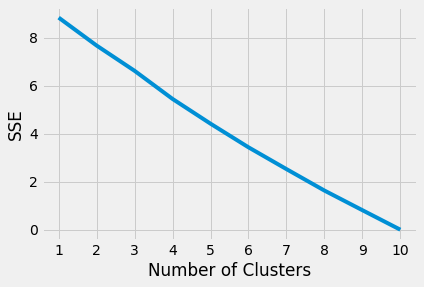

In [9]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Donde podemos ver que en $k=5$ se dobla ligeramente la curva.

De esta manera, ejecutamos nuestro algoritmo con $k=5$.

In [10]:
kmeans = KMeans(init='k-means++', n_clusters=5).fit(features)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.         0.04549937 0.04549937 ... 0.04549937 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.17149859 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.07938322 0.07938322]]


Realizamos nuestras predicciones.

In [11]:
y_pred = kmeans.predict(features)

Modificamos nuestro dataframe de tal forma que agregamos la nueva clasificación encontrada.

In [12]:
df['label'] = kmeans.labels_

In [13]:
df

,text,label
0,"El perro del doctor Dillon es muy astuto, es u...",0
1,¿El doctor Jekyll es el alter ego de Mr. Hyde ...,0
2,El maíz significa un principio vital y un elem...,1
3,En los organismos celulares desempeña diversas...,4
4,"Según el modelo estándar (SM, de sus siglas en...",2
5,En comparación con lobos de tamaño equivalente...,3
6,La isla del tesoro (Treasure Island) es una no...,0
7,Y es que el maíz ha tenido un papel fundamenta...,1
8,El dogma central de la biología molecular es u...,4
9,"Hasta la fecha, casi todas las pruebas experim...",2


In [14]:
print(df.groupby('label').size())

label
0    3
1    2
2    2
3    1
4    2
dtype: int64


Como podemos apreciar, los textos se clasificaron en $5$ grupos distintos. Separamos cada texto en un data frame distinto para poder visualizar los resultados.

In [15]:
df_0 = df.loc[df['label'] == 0]

df_0

,text,label
0,"El perro del doctor Dillon es muy astuto, es u...",0
1,¿El doctor Jekyll es el alter ego de Mr. Hyde ...,0
6,La isla del tesoro (Treasure Island) es una no...,0


In [16]:
df_1=df.loc[df['label'] == 1]

df_1

,text,label
2,El maíz significa un principio vital y un elem...,1
7,Y es que el maíz ha tenido un papel fundamenta...,1


In [17]:
df_2=df.loc[df['label'] == 2]

df_2

,text,label
4,"Según el modelo estándar (SM, de sus siglas en...",2
9,"Hasta la fecha, casi todas las pruebas experim...",2


In [18]:
df_3=df.loc[df['label'] == 3]

df_3

,text,label
5,En comparación con lobos de tamaño equivalente...,3


In [19]:
df_4=df.loc[df['label'] == 4]

df_4

,text,label
3,En los organismos celulares desempeña diversas...,4
8,El dogma central de la biología molecular es u...,4
